<a href="https://colab.research.google.com/github/visith1577/Machine-learning-first-projects/blob/main/Varational_autoencoder_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
MNIST = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = MNIST.load_data()

In [4]:
x_train = x_train.reshape(60000, 784)

# select only 300 test data for visualization
x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize data
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

In [5]:
inputs = tf.keras.Input(shape=(784, ))
encoder1 = tf.keras.layers.Dense(128, activation='sigmoid')(inputs)
encoder2 = tf.keras.layers.Dense(3, activation='sigmoid')(encoder1)
decoder1 = tf.keras.layers.Dense(128, activation='sigmoid')(encoder2)
decoder2 = tf.keras.layers.Dense(784, activation='sigmoid')(decoder1)

autoencoder = tf.keras.Model(inputs=inputs, outputs=decoder2)

In [6]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
history = autoencoder.fit(
    x_train,
    x_train,
    batch_size=128,
    epochs=100,
    shuffle=True,
    validation_data = (x_test, x_test)
)

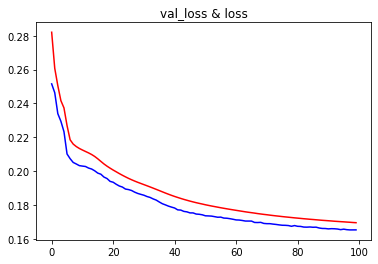

In [8]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = history.epoch

plt.plot(epoch, loss, 'r', label='loss')
plt.plot(epoch, val_loss, 'b', label='val_loss')
plt.title('val_loss & loss')
plt.show()

In [9]:
#encoder
encoder = tf.keras.Model(inputs=inputs, outputs=encoder2)

encoded_input = tf.keras.Input(shape=(3, ))
decoder_layer = autoencoder.layers[-2]
decoder_layer2 = autoencoder.layers[-1]
decoder = tf.keras.Model(inputs=encoded_input, outputs=decoder_layer2(decoder_layer(encoded_input)))

In [10]:
latent_vector = encoder.predict(x_test)

reconstructed_images = decoder.predict(latent_vector)

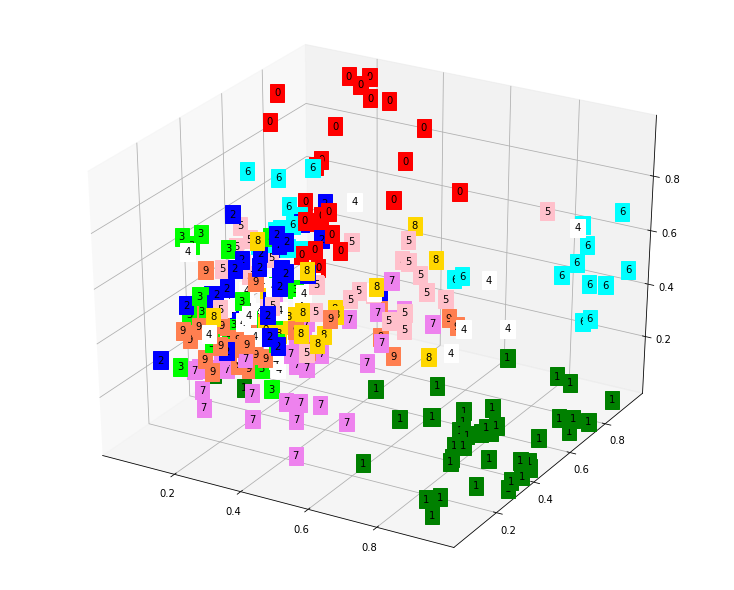

In [11]:
# visualize in 3D plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from IPython.display import Image
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

fig = plt.figure(1)
ax = Axes3D(fig)

xs = latent_vector[:, 0]
ys = latent_vector[:, 1]
zs = latent_vector[:, 2]

color=['red','green','blue','lime','white','pink','aqua','violet','gold','coral']

for x, y, z, label in zip(xs, ys, zs, y_test):
    c = color[int(label)]
    ax.text(x, y, z, label, backgroundcolor=c)
    
ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

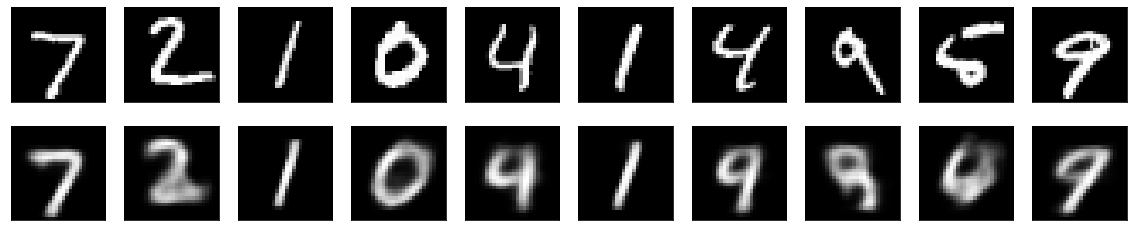

In [12]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()